1 - Importação de Bibliotecas

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


2 - Preparação do Dataset

In [5]:
# Baixar e preparar o dataset
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
dataset_path = tf.keras.utils.get_file("cats_and_dogs.zip", dataset_url, extract=True)
base_dir = dataset_path.rsplit('/', 1)[0] + "/cats_and_dogs_filtered"

train_dir = f"{base_dir}/train"
validation_dir = f"{base_dir}/validation"

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir, image_size=(160, 160), batch_size=32
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    validation_dir, image_size=(160, 160), batch_size=32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


3 - Pré-processamento

In [6]:
# Pré-processamento
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

4 - Criando o modelo

In [7]:
# Criar o modelo base pré-treinado
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(160, 160, 3),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False  # Congelar as camadas do modelo base

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


5 - Adicionando camadas

In [8]:
# Adicionar camadas personalizadas
global_average_layer = layers.GlobalAveragePooling2D()
prediction_layer = layers.Dense(1, activation="sigmoid")

model = models.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])

 6 - Compilar o modelo

In [9]:
# Compilar o modelo
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


7 - Treinar o modelo

In [10]:
# Treinar o modelo
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.5967 - loss: 0.6982 - val_accuracy: 0.7090 - val_loss: 0.5721
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7338 - loss: 0.5348 - val_accuracy: 0.7510 - val_loss: 0.5191
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7984 - loss: 0.4701 - val_accuracy: 0.7540 - val_loss: 0.5181
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.7888 - loss: 0.4478 - val_accuracy: 0.7780 - val_loss: 0.4813
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.8108 - loss: 0.4241 - val_accuracy: 0.7890 - val_loss: 0.4592


8 - Avaliar o modelo

In [11]:
# Avaliar o modelo
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

9 - Resultado

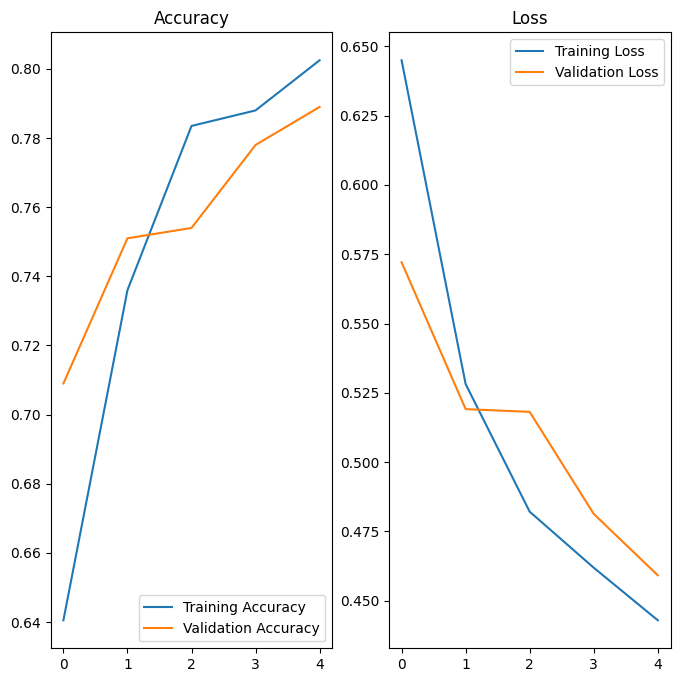

In [12]:
# Plotar os resultados
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Loss")
plt.show()

10 - Resultado Final

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


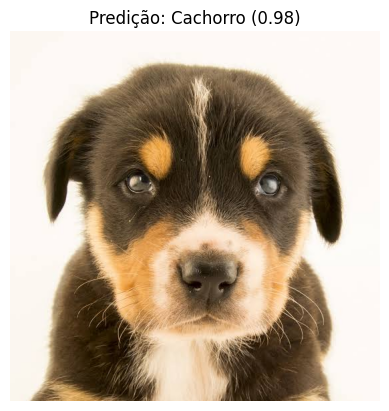

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


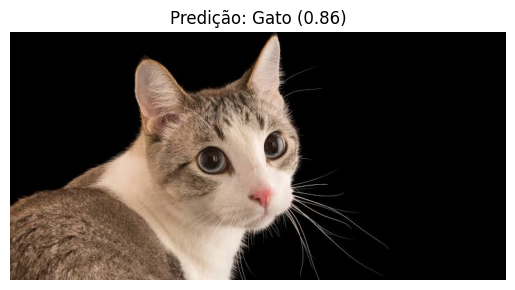

In [21]:
import requests
from PIL import Image
import numpy as np

def classify_image(url, model):
    # Baixar a imagem via URL
    response = requests.get(url, stream=True)
    response.raise_for_status()  # Verifica erros no download
    img = Image.open(response.raw).convert("RGB")

    # Redimensionar a imagem para o tamanho esperado pelo modelo
    img_resized = img.resize((160, 160))

    # Converter para array numpy e normalizar os valores
    img_array = np.array(img_resized) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Adicionar dimensão de batch

    # Fazer a previsão
    prediction = model.predict(img_array)[0][0]
    label = "Cachorro" if prediction > 0.5 else "Gato"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    # Exibir a imagem e o resultado
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predição: {label} ({confidence:.2f})")
    plt.show()

# Exemplo de uso
image_01 = "https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcQP5QQKcY4t1-_XAOvt_5Ii9LGJqTDX0B7u5sOZJFeU8QCGJ2jReifGEDftXkScCw-lMm8nmFUYF2QXwMR2KrzTsw"
classify_image(image_01, model)

image_02 = "https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcRv084ksxUc5GQhCvOXh2ECSKEnII6YalORoY4ZXpBPK_CHrvuJMEdIo2MVxBqPG7rIOoaphuul5etpRYL9VyJT8w"  # Link para uma imagem de teste
classify_image(image_02, model)
